In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

C:\Users\ebish\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<h1>Load data</h1>

In [2]:
file_name = "iris.data.csv"

In [3]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [4]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [5]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [26]:
#define number of training iterations
NUM_ITER = 100
#define learning rate
lr = 0.1

<h2>Define Placeholder and Variables</h2>

In [27]:
tf.reset_default_graph()
#define the placeholder to feed the training data later
X1 = tf.placeholder(tf.float32,shape=[None,2],name='X1')
Y1 = tf.placeholder(tf.float32,shape=[None,1],name='Y1')

#define the weights and initialize with random normal distribution
#we need weights and biases for the hidden layer and the ouput layer
W1=tf.Variable(tf.random_normal([2,1]),tf.float32,name='W1')

#define the bias with zero initialization
b1=tf.Variable(tf.zeros([1,1]),tf.float32,name='b1')


<h2>Define update rule and accuracy</h2>

In [28]:
#define the predicted output label, Tensorflow doesn't have step function, we use tf.round to do that
Y1_hat =tf.round( tf.sigmoid(tf.add(tf.matmul(X1,W1),b1)))
#the error between target and logit
error = Y1-Y1_hat

#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW = tf.matmul(tf.transpose(X1),error)
db = tf.reduce_sum(error,0)
W_ = W1 + lr*dW
b_ = b1 + lr*db

#group two operations together
step = tf.group(W1.assign(W_), b1.assign(b_))

#compare the predicted labels with true labels
correct_pred = tf.equal(Y1_hat,Y1)

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')



<h2>Execute training</h2>

In [29]:
#initialize tensorflow variables
init = tf.global_variables_initializer()
accuracy_score=[]
#cost_values=[]

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(NUM_ITER):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step,feed_dict = {X1:x_train_1,Y1:y_train_1})
        acc = sess.run(accuracy,feed_dict={X1:x_train_1, Y1:y_train_1})
        accuracy_score.append(acc)
        if i % 5 ==0:
            print("Epoch "+str(i)+", Accuracy= {:.3f}".format(acc))
            #cos=sess.run(cost,feed_dict={X1:x_train_1, Y1:y_train_1})
            #cost_values.append(cos)
            #print("Epoch "+str(i)+", Accuracy= {:.3f}".format(acc)+" , Cost={:.3f}".format(cos))
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X1:x_test_1, Y1:y_test_1}))

    
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W1 = np.squeeze(sess.run(W1))
    b1 = np.squeeze(sess.run(b1))
    

Epoch 0, Accuracy= 0.819
Epoch 5, Accuracy= 1.000
Epoch 10, Accuracy= 1.000
Epoch 15, Accuracy= 1.000
Epoch 20, Accuracy= 1.000
Epoch 25, Accuracy= 1.000
Epoch 30, Accuracy= 1.000
Epoch 35, Accuracy= 1.000
Epoch 40, Accuracy= 1.000
Epoch 45, Accuracy= 1.000
Epoch 50, Accuracy= 1.000
Epoch 55, Accuracy= 1.000
Epoch 60, Accuracy= 1.000
Epoch 65, Accuracy= 1.000
Epoch 70, Accuracy= 1.000
Epoch 75, Accuracy= 1.000
Epoch 80, Accuracy= 1.000
Epoch 85, Accuracy= 1.000
Epoch 90, Accuracy= 1.000
Epoch 95, Accuracy= 1.000
Testing Accuracy: 1.0


<h2>Plot</h2>

In [30]:
x=x_test_1.values

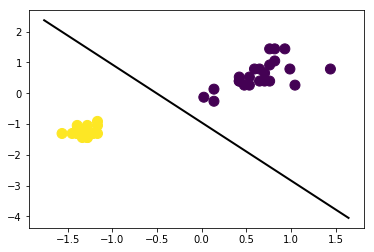

In [31]:
#plot out the decision line determined by learned weight and bias
import matplotlib.pyplot as plt
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = 1 / W1[1] * (-W1[0] * plot_x - b1)

plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y_test_1), s=100, cmap='viridis')
plt.plot( plot_x,plot_y, color='k', linewidth=2)
# plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

Text(0,0.5,'Accuracy Score')

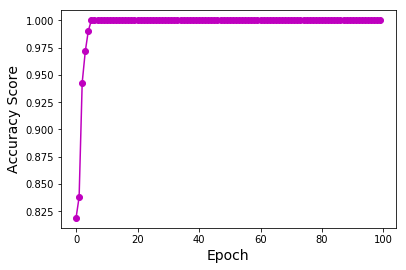

In [41]:
plt.plot(accuracy_score,'-o',color='m')
plt.xlabel('Epoch',size=14)
plt.ylabel('Accuracy Score',size=14)

# Which accuracy are you getting? What does it tell you about setosa w.r.t other two species?

I am getting 100% accuracy on my test dataset. This tells me that setosa is linearly separable w.r.t the other two species. This means that our input variables are good at helping us distinguish between setosa versus other two species. 

Some other interesting finds is that we get to 100% accuracy during training is usually less than 10 epochs. This can be seen in our graph above. 

<h1>Part b:</h1>

In [42]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameter</h2>

In [77]:
#define number of training iterations
NUM_ITER = 100
#define learning rate
lr = 0.1

<h2>Define Placeholder and Variables</h2>

In [78]:
tf.reset_default_graph()
#define the placeholder to feed the training data later
X2 = tf.placeholder(tf.float32,shape=[None,2],name='X2')
Y2 = tf.placeholder(tf.float32,shape=[None,1],name='Y2')

#define the weights and initialize with random normal distribution
#we need weights and biases for the hidden layer and the ouput layer
W2=tf.Variable(tf.random_normal([2,1]),tf.float32,name='W2')

#define the bias with zero initialization
b2=tf.Variable(tf.zeros([1,1]),tf.float32,name='b2')


<h2>Define update rule and accuracy</h2>

In [79]:
#define the predicted output label, Tensorflow doesn't have step function, we use tf.round to do that
Y2_hat = tf.round(tf.sigmoid(tf.add(tf.matmul(X2,W2),b2)))
#the error between target and logit
error = Y2-Y2_hat

#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
dW = tf.matmul(tf.transpose(X2),error)
db = tf.reduce_sum(error,0)
W_ = W2 + lr*dW
b_ = b2 + lr*db

#group two operations together
step = tf.group(W2.assign(W_), b2.assign(b_))

#compare the predicted labels with true labels
correct_pred = tf.equal(Y2_hat,Y2)

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')


<h2>Execute training</h2>

In [80]:
#initialize tensorflow variables
init = tf.global_variables_initializer()
accuracy_score2=[]

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(NUM_ITER):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step,feed_dict = {X2:x_train_2,Y2:y_train_2})
        acc = sess.run(accuracy,feed_dict={X2:x_train_2, Y2:y_train_2})
        accuracy_score2.append(acc)
        if i % 5 ==0:
            print("Epoch "+str(i)+", Accuracy= {:.3f}".format(acc))
#             cos=sess.run(cost,feed_dict={X2:x_train_2, Y2:y_train_2})
#             print("Epoch "+str(i)+", Accuracy= {:.3f}".format(acc)+" Cost={:.3f}".format(cos))
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X2:x_test_2, Y2:y_test_2}))
    
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W2 = np.squeeze(sess.run(W2))
    b2 = np.squeeze(sess.run(b2))
    

Epoch 0, Accuracy= 0.686
Epoch 5, Accuracy= 0.962
Epoch 10, Accuracy= 0.962
Epoch 15, Accuracy= 0.962
Epoch 20, Accuracy= 0.962
Epoch 25, Accuracy= 0.962
Epoch 30, Accuracy= 0.962
Epoch 35, Accuracy= 0.962
Epoch 40, Accuracy= 0.962
Epoch 45, Accuracy= 0.962
Epoch 50, Accuracy= 0.962
Epoch 55, Accuracy= 0.962
Epoch 60, Accuracy= 0.962
Epoch 65, Accuracy= 0.962
Epoch 70, Accuracy= 0.962
Epoch 75, Accuracy= 0.962
Epoch 80, Accuracy= 0.962
Epoch 85, Accuracy= 0.762
Epoch 90, Accuracy= 0.962
Epoch 95, Accuracy= 0.971
Testing Accuracy: 0.95555556


<h2>Plot</h2>

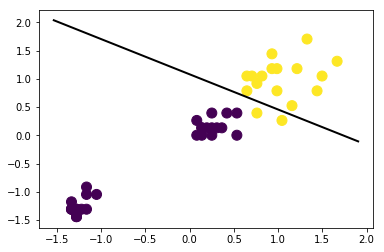

In [81]:
x2=x_test_2.values
#plot out the decision line determined by learned weight and bias
import matplotlib.pyplot as plt
plot_x2 = np.array([np.min(x2[:, 0] - 0.2), np.max(x2[:, 1]+0.2)])
plot_y2 = 1 / W2[1] * (-W2[0] * plot_x2 - b2)

plt.scatter(x2[:, 0], x2[:, 1], c=np.squeeze(y_test_2), s=100, cmap='viridis')
plt.plot( plot_x2,plot_y2, color='k', linewidth=2)
# plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()

Text(0,0.5,'Accuracy Score')

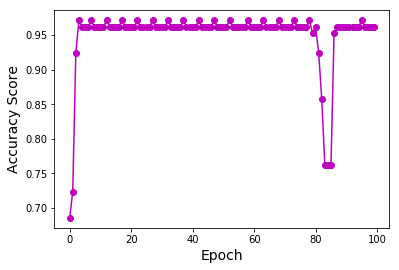

In [82]:
plt.plot(accuracy_score2,'-o',color='m')
plt.xlabel('Epoch',size=14)
plt.ylabel('Accuracy Score',size=14)

# Which accuracy are you getting now? What does it tell you about the classification? 

Depending on the time I run the code I get an accuracy from 95%-97% on the testing dataset. This to me implies that the dataset is not linearly separable, but then when I plot the decision boundary in the figure above it looks like it is linearly separable. So, I tried more iterations just to see if that is what it needed, but it doesn't get us 100% accuracy in the test dataset. It gives us about 95%-97%. So either we don't have linearly separable groups or we are overfitting on the training set and thus our model isn't representative of the overall population and thus doesn't get us 100% accuracy on the test dataset. 

<h1>Part c:</h1>

In [83]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [84]:
#define number of training iterations
NUM_ITER = 100
#define learning rate
lr = .1
n_hidden_1=256
n_hidden_2=128
num_input=4
num_classes=3

<h2>Define placehoder and variables</h2>

In [85]:
tf.reset_default_graph()

#tf graph input
X=tf.placeholder(tf.float32,[None,num_input],name='X')
Y=tf.placeholder(tf.float32,[None, num_classes],name='Y')

#Lyaers weight and bias
weights = {
    'W1':tf.Variable(tf.random_normal([num_input,n_hidden_1]),name='W1'),
    'W2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2]),name='W2'),
    'Wout':tf.Variable(tf.random_normal([n_hidden_2,num_classes]),name='Wout')
}

biases={
    'b1':tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'b2':tf.Variable(tf.zeros(shape=[n_hidden_2]),name='b2'),
    'bout':tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}

<h2>Define the neural network</h2>

In [86]:
def neural_net(x):
    layer_1_out=tf.nn.relu(tf.add(tf.matmul(x,weights['W1']),biases['b1']))
    layer_2_out=tf.nn.relu(tf.add(tf.matmul(layer_1_out,weights['W2']),biases['b2']))
    out=tf.add(tf.matmul(layer_2_out,weights['Wout']),biases['bout'])
    return out

<h2>Define cost function and accuracy</h2>

In [87]:
#predicted labels
logits=neural_net(X)

#define loss
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')
#define optimizer
optimizer=tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op=optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')


<h2>Execute training</h2>

In [92]:
#Initialize the variables
init = tf.global_variables_initializer()
cost_values=[]
accuracy_scores3=[]

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(NUM_ITER):
        #run optimization
        sess.run(train_op, feed_dict={X:x_train_3, Y:y_train_3})
        acc = sess.run(accuracy,feed_dict={X:x_train_3, Y:y_train_3})
        cos=sess.run(loss,feed_dict={X:x_train_3, Y:y_train_3})
        cost_values.append(cos)
        accuracy_scores3.append(acc)
        if i % 5 ==0:   
            print("Epoch "+str(i)+", Accuracy= {:.3f}".format(acc)+" Cost={:.3f}".format(cos))
        
    
    print("Training finished!")
    
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:x_test_3, Y:y_test_3}))

Epoch 0, Accuracy= 0.705 Cost=274.124
Epoch 5, Accuracy= 0.943 Cost=1.754
Epoch 10, Accuracy= 0.819 Cost=17.251
Epoch 15, Accuracy= 1.000 Cost=0.001
Epoch 20, Accuracy= 1.000 Cost=0.000
Epoch 25, Accuracy= 1.000 Cost=0.000
Epoch 30, Accuracy= 1.000 Cost=0.000
Epoch 35, Accuracy= 1.000 Cost=0.000
Epoch 40, Accuracy= 1.000 Cost=0.000
Epoch 45, Accuracy= 1.000 Cost=0.000
Epoch 50, Accuracy= 1.000 Cost=0.000
Epoch 55, Accuracy= 1.000 Cost=0.000
Epoch 60, Accuracy= 1.000 Cost=0.000
Epoch 65, Accuracy= 1.000 Cost=0.000
Epoch 70, Accuracy= 1.000 Cost=0.000
Epoch 75, Accuracy= 1.000 Cost=0.000
Epoch 80, Accuracy= 1.000 Cost=0.000
Epoch 85, Accuracy= 1.000 Cost=0.000
Epoch 90, Accuracy= 1.000 Cost=0.000
Epoch 95, Accuracy= 1.000 Cost=0.000
Training finished!
Testing Accuracy: 0.93333334


<h2>Plot</h2>

Text(0,0.5,'Accuracy Score')

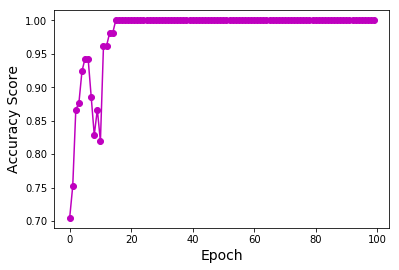

In [93]:
plt.plot(accuracy_scores3,'-o',color='m')
plt.xlabel('Epoch',size=14)
plt.ylabel('Accuracy Score',size=14)

Text(0,0.5,'Cost')

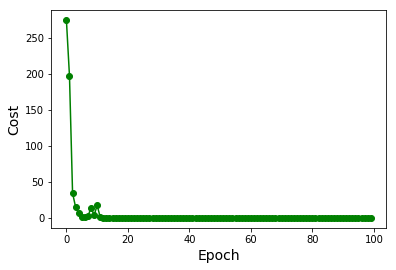

In [95]:
plt.plot(cost_values,'-o',color='g')
plt.xlabel('Epoch',size=14)
plt.ylabel('Cost',size=14)